In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [109]:
# Load the dataset
df = pd.read_csv('BMD-2.csv')
df.head()

,id,age,weight_kg,height_cm,bmd,fracture
0,469,57.052768,64.0,155.5,0.8793,no fracture
1,8724,75.741225,78.0,162.0,0.7946,no fracture
2,6736,70.778900,73.0,170.5,0.9067,no fracture
3,24180,78.247175,60.0,148.0,0.7112,no fracture
4,17072,54.191877,55.0,161.0,0.7909,no fracture


In [110]:
# Set Features and Target Variable
x = df[['age', 'weight_kg','height_cm','bmd']]
y = df['fracture']

# Normalize the dataset

In [131]:
from sklearn.preprocessing import MinMaxScaler

min_max_scale = MinMaxScaler()
df[['age', 'weight_kg','height_cm','bmd']] = min_max_scale.fit_transform(df[['age', 'weight_kg','height_cm','bmd']])

print(df)

        id       age  weight_kg  height_cm       bmd     fracture
0      469  0.401187   0.466667   0.385714  0.494030  no fracture
1     8724  0.754200   0.700000   0.571429  0.405320  no fracture
2     6736  0.660465   0.616667   0.814286  0.522727  no fracture
3    24180  0.801536   0.400000   0.171429  0.317972  no fracture
4    17072  0.347146   0.316667   0.542857  0.401445  no fracture
..     ...       ...        ...        ...       ...          ...
164  21892  0.796537   0.633333   0.628571  0.404797     fracture
165  24140  0.273353   0.383333   0.542857  0.407939     fracture
166   6969  0.199201   0.516667   0.771429  0.414851     fracture
167   5505  0.358413   0.566667   0.685714  0.418517     fracture
168     71  0.645654   0.541667   0.657143  0.480519     fracture

[169 rows x 6 columns]


The resulting normalized values represent the original data on 0 to 1 scale.
So, 'age', 'weight_kg','height_cm','bmd' will all be on the same scale after normalization.

NOTE: In min-max normalization, the min value gets transformed into 0 and the max value gets transformed into 1. All values in-between get scaled to be within 0-1 range based on the original value relative to min and max values of the dataset. 


In [132]:
# To see the distribution of the dataset.
df.fracture.value_counts()

no fracture    119
fracture        50
Name: fracture, dtype: int64

#### Imbalanced dataset - 119 and 50. One class has more weight than the other class. 

To handle imbalanced dataset, we can:
1. Reduce the size of larger class
2. Add to smaller class

#### In this analysis, we will reduce the size of larger class.

In [133]:
df_majority = df[df['fracture'] == 'no fracture']
df_minority = df[df['fracture'] == 'fracture']


from sklearn.utils import resample

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=96) 

# Combining minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.head()

,id,age,weight_kg,height_cm,bmd,fracture
68,8896,0.298122,0.300000,0.342857,0.385316,no fracture
111,23790,0.314778,0.383333,0.242857,0.339129,no fracture
40,55,0.706773,0.266667,0.314286,0.319648,no fracture
49,5509,0.775407,0.866667,0.714286,0.622015,no fracture
83,8999,0.461327,0.566667,0.457143,0.448890,no fracture


In [134]:
df_downsampled.fracture.value_counts()

no fracture    50
fracture       50
Name: fracture, dtype: int64

#### Now we have a perfectly balanced data.

# Exploratory Data Analysis

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


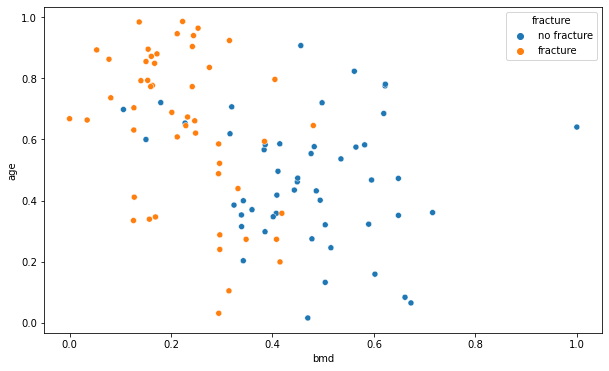

In [135]:
#EDA
plt.figure(figsize=(10,6))

sns.scatterplot(df_downsampled.bmd, df_downsampled.age, hue=df_downsampled.fracture)
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


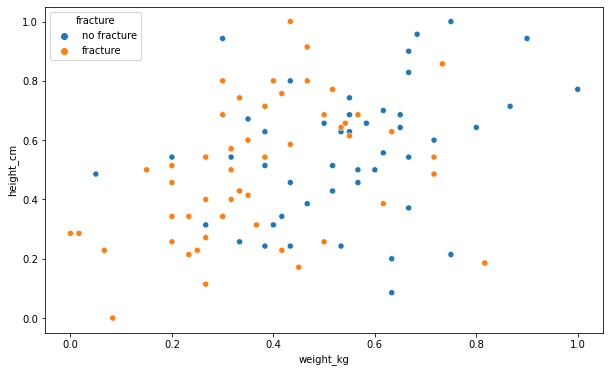

In [136]:
#EDA
plt.figure(figsize=(10,6))

sns.scatterplot(df_downsampled.weight_kg, df_downsampled.height_cm, hue=df_downsampled.fracture)
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


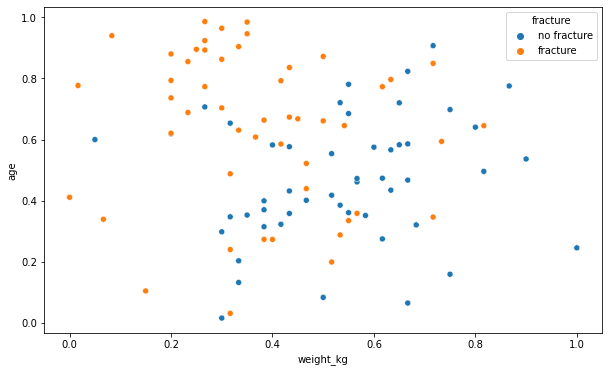

In [137]:
#EDA
plt.figure(figsize=(10,6))

sns.scatterplot(df_downsampled.weight_kg, df_downsampled.age, hue=df_downsampled.fracture)
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


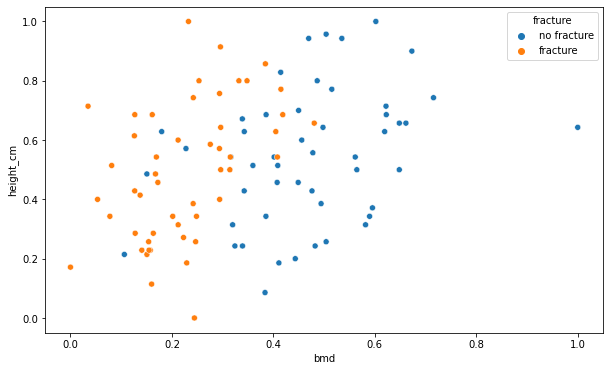

In [138]:
#EDA
plt.figure(figsize=(10,6))

sns.scatterplot(df_downsampled.bmd, df_downsampled.height_cm, hue=df_downsampled.fracture)
plt.show()

# Split to X & Y 

In [139]:
# Set Features and Target Variable
x = df_downsampled[['age', 'weight_kg','height_cm','bmd']]
y = df_downsampled['fracture']

# KNN

* Supervised method - to help you determine how to classify
* categorical var (binry, multi, ordinal)
* uses proximity to make predictions
* Goal: to identify the nearest neighbors of the new data point, so we can determine the class to which we will ssign it to 

Application: Missing data imputation, Recommendation system



#### Difference between Logistic & KNN:
* LR: Selecting regulator ie Ridge/Lasso
* KNN: User has to input parameter 'k'


# Determine K value 

* How many neighbors will we check to determine the classification of the new data point.
* Different values can lead to overfitting or underfitting.


##### Smaller k: Model = complex ; 
##### Larger k: Model = simple ; generalize better




* Can't choose 1. Too small & limitng. 
* Next 2. Even numbers are generally avoided as you cannot pick one of the two classification decidedly. Hence, it is advisable to pick odd number so we can strognly pick the class with...

### To determine 'k', there are 2 methods:

1. Square root of N (N = number of samples) - Traditional method

* Used more as a starting point

For eg, in our dataset we have 100 observations after downsampling. So, the square root of 100 is 10. So we start with k = 10.  We will also check for 9 and 11.


2. Derive a plot between error rate and K denoting values in a defined range. Then choose the K value as having a minimum error rate.








# METHOD 1 (Square root of N)

##### Checking Accuracy with 3 different values of K: 10, 9, 11

# Create the KNN model

In [140]:
# Set the number of nearest neighbors to consider
k = 10  
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

# Common distances metrics used:

To determine which data points are closest to a given new data point, the distance between the new data point and the other data points will need to be calculated.


* Euclidean(p=2): straight line
* Manhattan(p=1): grid
* Chebyshev
* Mahalanobis 


Default is “minkowski”, which results in the standard Euclidean distance when p = 2. S

Reference:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



# Model Fitting

In [141]:
# Fit the model on the training set
knn.fit(x, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

# Prediction on Test data


In [142]:
# Predict the labels of the test set
y_pred = knn.predict(x)

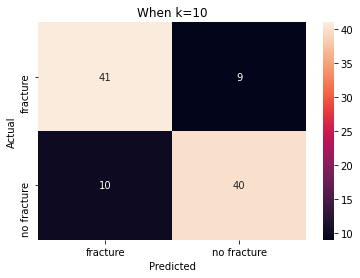

In [143]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When k=10')

plt.show()


### 41+40 correct predictions (81 correctly clasified patients) and 10+9 incorrect predictions (19 incorrectly classified patients).


From the confusion matrix, we can see that the KNN algorithm classified 37 correct predictions for the "fracture" class and 38 correct predictions for the "no fracture" class. 
It made 12 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 13 incorrect predictions for the "no fracture" class, which were classified as "fracture".

# Evaluate the Model

* Accuracy Score



In [144]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print('Accuracy for k = 10 :', accuracy)

Accuracy for k = 10 : 0.81


#### k = 10, accuracy score = 0.81

# WHEN k =  9

In [145]:
# Create a KNN classifier object with 9 neighbors and the Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

# Fit the model on the training data
knn.fit(x, y)

# Predict the target values for the test data
y_pred = knn.predict(x)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print('Accuracy for k = 9 :', accuracy)

Accuracy for k = 9 : 0.79


#### k = 9, accuracy score = 0.79

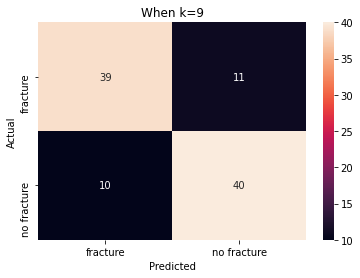

In [146]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When k=9')
plt.show()


### 39+40 correct predictions (79 correctly clasified patients) and 10+11 incorrect predictions (21 incorrectly classified patients).


# WHEN k = 11

In [147]:
# Create a KNN classifier object with 11 neighbors and the Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')

# Fit the model on the training data
knn.fit(x, y)

# Predict the target values for the test data
y_pred = knn.predict(x)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print('Accuracy for k = 11 :', accuracy)

Accuracy for k = 11 : 0.8


#### k = 11, accuracy score = 0.8

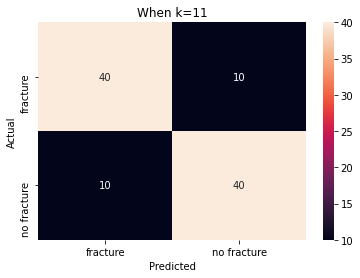

In [148]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When k=11')
plt.show()

### 40+40 correct predictions (80 correctly clasified patients) and 10+10 incorrect predictions (20 incorrectly classified patients).


# Analyze results for multiple K value

1. In terms of Accuracy Score
* k = 9 ; 0.79
* k = 10 ; 0.81
* k = 11 ; 0.8 

### So, k = 10 is the better performacer in terms of accuracy score. 

2. In terms of Confusion Matrix
* k = 9 ;  39+40 correct predictions (79 correctly clasified patients) and 10+11 incorrect predictions (21 incorrectly classified patients).
* k = 10 ; 41+40 correct predictions (81 correctly clasified patients) and 10+9 incorrect predictions (19 incorrectly classified patients).
* k = 11 ; 40+40 correct predictions (80 correctly clasified patients) and 10+10 incorrect predictions (20 incorrectly classified patients).



### So, k = 10 is the better performer in terms of confusion matrix as it correctly predicted 81 patients and classified only 19 incorrect patients - which is the best result out of them all.





____

# METHOD 2 (classifier error rate)


The code snippet is used to determine the classifier error rate for different values of k in K-Nearest Neighbor classification. 
It does this by iterating through values of k from 1 to 9 and for each value of k, it trains a KNeighborsClassifier model on the entire dataset and then predicts the target variable for the same dataset using the model. The predicted values are compared to the actual values of the target variable and the mean error rate is computed and appended to a list called "error_rate".The plot helps in selecting the optimal value of k that results in the lowest error rate. 


Text(0, 0.5, 'Error Rate')

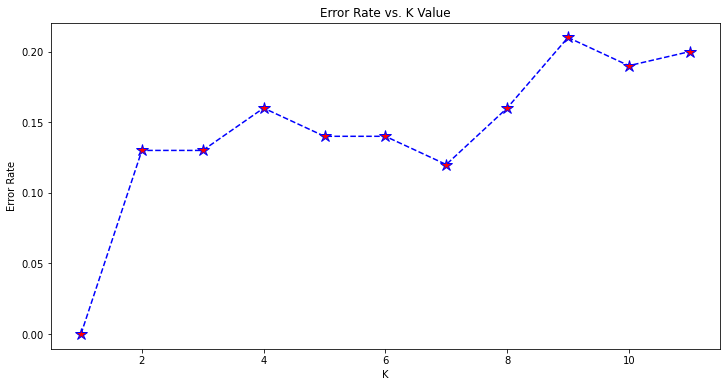

In [159]:
#Determine classifier error rate
error_rate = []
for i in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x, y)
    #Y_pred=knn.predict(X)
    pred_i = knn.predict(x)
    error_rate.append(np.mean(pred_i != y))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,12),error_rate,color='blue', linestyle='dashed', marker='*',
markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


# From the plot, we can see that the smallest error we got is at K=7.


Ideally, we want to pick the one with the lowest error rate. But we can't pick 1 as it is not sufficient since it will one class only, so we exclude 1.


In [160]:
# Create a KNN classifier object with 7 neighbors and the Euclidean distance metric
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

# Fit the model on the training data
knn.fit(x, y)

# Predict the target values for the test data
y_pred = knn.predict(x)

# Calculate the accuracy of the model
accuracy = accuracy_score(y, y_pred)
print('Accuracy for k = 7 :', accuracy)

Accuracy for k = 7 : 0.88


#### k = 7, accuracy score = 0.88

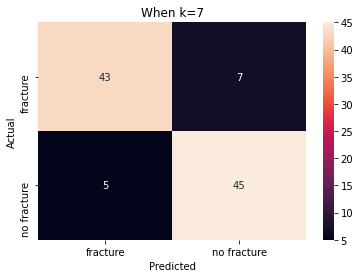

In [161]:
confusion_matrix = pd.crosstab(y, y_pred, rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.title('When k=7')
plt.show()

### 43+45 correct predictions (88 correctly clasified patients) and 5+7 incorrect predictions (12 incorrectly classified patients).


From the confusion matrix, we can see that the KNN algorithm classified 43 correct predictions for the "fracture" class and 45 correct predictions for the "no fracture" class. 
It made 5 incorrect predictions for the "fracture" class, which were classified as "no fracture", and 7 incorrect predictions for the "no fracture" class, which were classified as "fracture".

## So, using both the methods for determining the value of K, we checked for k = 7, 9, 10, 11

### Ultimtely, the one with the best results was k =7, in terms of accuracy score and confusion matrix (correct and incorrect classifications)

# After we are satisfied with the performance of leaner, we use new data point to make predictions too see how the learner works/ how well the learner predicts


Note: Because we have normalized the data before feeding into the model, we also have to normalize the new data point before feeding it into the algorithmn

In [179]:
#'age', 'weight_kg','height_cm','bmd'
prediction = knn.predict([[57,64,155,0.8793]])
print ('Predicted Result: ', prediction)


Predicted Result:  ['no fracture']


In [178]:
# Normalize the data
data_to_normalize = [[57,64,155,0.8793]]
normalized_data = scaler.fit_transform(data_to_normalize)

# Update the original DataFrame with the normalized values
df_downsampled[['age', 'weight_kg', 'height_cm', 'bmd']] = normalized_data

print(df_downsampled)

ValueError: Length of values (1) does not match length of index (100)

----

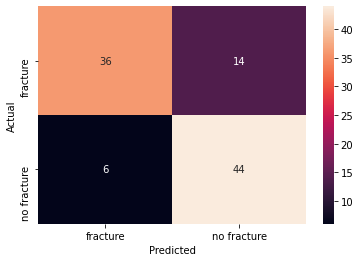

Accuracy for Logistic Regression =  0.8


In [168]:
#Recap result of Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Creating LR model
model_LR = LogisticRegression()

# Fit the model using training data
model_LR.fit(x,y)

y_predict = model_LR.predict(x)

confusion_matrix = pd.crosstab(y, y_predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

accuracy = metrics.accuracy_score(y,y_predict)
print('Accuracy for Logistic Regression = ', accuracy)

# Comparison to results of Logistic Regression

### 1. In terms of Accuracy Score

Comparing the KNN algorithm's performance with logistic regression, which was applied earlier, we can see that logistic regression achieved an accuracy of 0.80. Therefore, KNN (when k = 7, accuracy score = 0.88) performed better than logistic regression in terms of classification accuracy on this dataset.


### 2. In terms of classfications:

#### Correct Classifications:
* KNN:88 correct predictions
* LR: 80

#### Incorrect/Missclassifications:
* KNN: 12 incorrect predictions
* LR: 20


So, KNN had more correct classifications & less missclssifications compared to Logistic Regression. Hence, KNN is the better model!